In [1]:
import pandas as pd 
import numpy as np 
from textblob import TextBlob
from textblob import Word
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


In [2]:
df_opinion = pd.read_excel(r'C:\Users\mrosk\OneDrive\Desktop\Mental-Health-in-Tech\Subsets\opinion_mine_subset.xlsx')

In [3]:
df_opinion.drop(df_opinion.columns[0], axis=1, inplace= True)
df_opinion.head()

why_physical  \
0  It would depend on the health issue. If there ...   
1  They would provable need to know, to Judge if ...   
2  old back injury, doesn't cause me many issues ...   
3  Depending on the interview stage and whether I...   
4  If it would potentially affect my ability to d...   

                                          why_mental  \
0  While mental health has become a more prominen...   
1                                   Stigma, mainly.    
2  would not if I was not 100% sure that the disc...   
3                                       I don't know   
4  It would depend on the field & what I knew of ...   

  willing_discuss_physical_health_in_interview  \
0                                        Maybe   
1                                          Yes   
2                                          Yes   
3                                        Maybe   
4                                          Yes   

  willing_discuss_mental_health_in_interview  \
0                                         No   
1                                        Yes   
2                                      Maybe   
3                                         No   
4                                      Maybe   

  identified_mental_health_impact_career team_view_negatively_mental_health  \
0             No, I don't think it would       No, I don't think they would   
1                                  Maybe                              Maybe   
2                  Yes, I think it would                              Maybe   
3                  Yes, I think it would                              Maybe   
4                  Yes, I think it would                              Maybe   

  willing_share_mental_health_with_friends_family  \
0                                   Somewhat open   
1                                   Somewhat open   
2                                         Neutral   
3                                   Somewhat open   
4                                   Somewhat open   

  observed_bad_mental_health_response  \
0                                  No   
1                      Maybe/Not sure   
2                                  No   
3                  Yes, I experienced   
4                  Yes, I experienced   

  less_likely_to_reveal_due_to_observation   num_employees  ...  m_other  \
0                                      NaN            6-25  ...        0   
1                                      Yes            6-25  ...        0   
2                                      NaN               1  ...        0   
3                                      Yes            6-25  ...        0   
4                                       No  More than 1000  ...        0   

   m_dissociative  pro_adhd pro_addictive pro_anxiety_stress  \
0               0         0             0                  1   
1               0         0             0                  0   
2               0         0             0                  1   
3               0         0             0                  1   
4               0         0             0                  0   

  pro_autism_develop pro_mood_disorder pro_ptsd  pro_personality  pro_other  
0                  0                 1        0                0          0  
1                  0                 0        0                0          0  
2                  0                 1        0                0          0  
3                  0                 0        0                0          0  
4                  0                 0        0                0          0  

[5 rows x 73 columns]

In [4]:
df_opinion.shape

(1065, 73)

In [5]:
'''def batch_spell_correction(text_series, batch_size =100):
    corrected_texts = []
    
    for i in range(0,len(text_series), batch_size):
        batch = text_series[i:i+batch_size]
        corrected_batch = []
        for text in batch:
            blob =TextBlob(text)
            corrected_text = str(blob.correct())
            corrected_batch.append(corrected_text)
        corrected_texts.extend(corrected_batch)
        print(f'Batch {i//batch_size + 1} completed')
    return corrected_texts

df_opinion['why_mental_corrected'] = batch_spell_correction(df_opinion['why_mental'])
df_opinion['why_mental_physical'] = batch_spell_correction(df_opinion['why_physical'])'''


"def batch_spell_correction(text_series, batch_size =100):\n    corrected_texts = []\n    \n    for i in range(0,len(text_series), batch_size):\n        batch = text_series[i:i+batch_size]\n        corrected_batch = []\n        for text in batch:\n            blob =TextBlob(text)\n            corrected_text = str(blob.correct())\n            corrected_batch.append(corrected_text)\n        corrected_texts.extend(corrected_batch)\n        print(f'Batch {i//batch_size + 1} completed')\n    return corrected_texts\n\ndf_opinion['why_mental_corrected'] = batch_spell_correction(df_opinion['why_mental'])\ndf_opinion['why_mental_physical'] = batch_spell_correction(df_opinion['why_physical'])"

In [6]:
custom_dict_mental_corrections = {
    'stigma': 'stigma',
    'empathize': 'empathize',
    'instability': 'instability',
    'asinine': 'asinine',
    'coping': 'coping',
    'fears.': 'fears',
    'schedule)': 'schedule',
    'refuse,': 'refuse',
    'quit,': 'quit',
    'method.': 'method',
    'deal,': 'deal',
    'thing:': 'thing',
    'thing,': 'thing',
    'bias.': 'bias',
    'vibe': 'vibe',
    'strong.': 'strong',
    'home.': 'home',
    'depressive': 'depressive',
    'experience.': 'experience',
    'addiction': 'addiction',
    'impacts': 'impacts',
    'adjustments?': 'adjustments',
    'w/hr': 'hr',
    'anxiety"': 'anxiety',
    'ime': 'me',
    'phd': 'phd',
    'sgi': 'sgi',
    'shrooms': 'shrooms',
    'llvm': 'llvm',
    'compiler': 'compiler',
    'system.': 'system',
    'medication': 'medication',
    'meth': 'meth',
    'of.': 'of',
    'autistic': 'autistic',
    'problem,': 'problem',
    'hurt.': 'hurt',
    'recourse.': 'recourse',
    'smp': 'smp',
    '90s': '90s',
    'wrt': 'wrt',
    'faking': 'faking',
    'town.': 'town',
    'carpet.': 'carpet',
    'crap': 'crap',
    'gig,': 'gig',
    'preform': 'perform',
    'whining.': 'whining',
    'knowingly': 'knowingly',
    'proactive': 'proactive',
    'new': 'new',
    'thing"': 'thing',
    'shame.': 'shame',
    'equated': 'equated',
    'bias?': 'bias',
    'unless': 'unless',
    'ardor': 'ardor',
    'bipolar': 'bipolar',
    'madden': 'madden',
    'admin.': 'admin',
    'disorder,': 'disorder',
    'biases': 'biases',
    'responsibilities.': 'responsibilities',
    'imo': 'imo',
    'off/etc': 'off',
    'woud': 'would',
    'weren\'t': 'weren\'t',
    'pertinent': 'pertinent',
    'unproductive': 'productive',
    'google': 'google',
    'relevancy': 'relevancy',
    'intangible,': 'intangible',
    'burnout': 'burnout',
    'tmi,': 'tmi',
    'applicable,': 'applicable',
    'prompted,': 'prompted',
    'blocker': 'blocker',
    'ramps,': 'ramps',
    'cultural': 'cultural',
    'choosy': 'choosy',
    'tolerance': 'tolerance',
    'candidacy': 'candidacy',
    'reliable': 'reliable'
}

custom_dict_physical_corrections = {
    'provable': 'probable',
    'doesnt': 'doesn\'t',
    'impacts': 'impacts',
    'i\'m': 'i\'m',
    'impairments': 'impairments',
    'judgements': 'judgements',
    'i\'d': 'i\'d',
    'aren\'t': 'aren\'t',
    'suprises': 'surprises',
    'divulge': 'divulge',
    'dependant': 'dependent',
    'insurmountable': 'insurmountable',
    'ergonomic': 'ergonomic',
    'it\'d': 'it\'d',
    'wasn\'t': 'wasn\'t',
    'you\'re': 'you\'re',
    'jeopardizes': 'jeopardizes',
    'it\'ll': 'it\'ll',
    'empathetic': 'empathetic',
    'scenario,': 'scenario',
    'discrimination,': 'discrimination',
    'visible,': 'visible',
    'me/the': 'me/the',
    'lifting,': 'lifting',
    'liability,': 'liability',
    'hypochondriac': 'hypochondriac',
    'rsi': 'rsi',
    'dna': 'dna',
    'legit': 'legit',
    'coudl': 'could',
    'in.': 'in',
    'jeopardize': 'jeopardize',
    'trought': 'thought',
    'contender': 'contender',
    'ptos': 'ptos',
    'relevent': 'relevant',
    'unconcious': 'unconscious',
    'illegally,': 'illegally',
    'not?': 'not?',
    'not-work': 'not work',
    'navigable': 'navigate',
    'embarassing': 'embarrassing',
    'absences': 'absences',
    'allergies': 'allergies',
    'choosy': 'choosy',
    'healthier': 'healthier',
    'stranger.': 'stranger',
    'teaches': 'teaches',
    'thay': 'that',
    'overly': 'overly',
    'w/': 'w/',
    'labeled': 'labeled',
    'biased': 'biased',
    'uk': 'uk',
    'attached,': 'attached',
    'ge': 'ge',
    'qf': 'of'
}

merged_custom_dict = {**custom_dict_physical_corrections, **custom_dict_mental_corrections}
merged_custom_dict

{'provable': 'probable',
 'doesnt': "doesn't",
 'impacts': 'impacts',
 "i'm": "i'm",
 'impairments': 'impairments',
 'judgements': 'judgements',
 "i'd": "i'd",
 "aren't": "aren't",
 'suprises': 'surprises',
 'divulge': 'divulge',
 'dependant': 'dependent',
 'insurmountable': 'insurmountable',
 'ergonomic': 'ergonomic',
 "it'd": "it'd",
 "wasn't": "wasn't",
 "you're": "you're",
 'jeopardizes': 'jeopardizes',
 "it'll": "it'll",
 'empathetic': 'empathetic',
 'scenario,': 'scenario',
 'discrimination,': 'discrimination',
 'visible,': 'visible',
 'me/the': 'me/the',
 'lifting,': 'lifting',
 'liability,': 'liability',
 'hypochondriac': 'hypochondriac',
 'rsi': 'rsi',
 'dna': 'dna',
 'legit': 'legit',
 'coudl': 'could',
 'in.': 'in',
 'jeopardize': 'jeopardize',
 'trought': 'thought',
 'contender': 'contender',
 'ptos': 'ptos',
 'relevent': 'relevant',
 'unconcious': 'unconscious',
 'illegally,': 'illegally',
 'not?': 'not?',
 'not-work': 'not work',
 'navigable': 'navigate',
 'embarassing': 

In [7]:
#Spell checker with predefined dictionary for mistranslations 

df_opinion['why_mental'] = df_opinion['why_mental'].str.lower()
df_opinion['why_physical'] = df_opinion['why_physical'].str.lower()

def batch_spell_correction_with_tracking(text_series, batch_size=200):
    corrections = {}
    corrected_texts = []
    batch_count = 0

    for i in range(0, len(text_series), batch_size):
        batch = text_series[i:i + batch_size]
        batch_corrected_texts = []
        for text in batch:
            words = text.split()
            corrected_words = []
            for word in words:
                # Check if the word is in the merged dictionary
                if word.lower() in merged_custom_dict:
                    corrected_word = merged_custom_dict[word.lower()]
                    corrections[word] = corrected_word
                else:
                    suggestions = Word(word).spellcheck()
                    corrected_word = suggestions[0][0] if suggestions else word
                    if word.lower() != corrected_word.lower():  # Track changes
                        corrections[word] = corrected_word
                corrected_words.append(corrected_word)
            batch_corrected_texts.append(' '.join(corrected_words))
        corrected_texts.extend(batch_corrected_texts)
        batch_count += 1
        print(f"Completed batch {batch_count}")

    return corrected_texts, corrections

# Apply the function and get corrections
df_opinion['why_mental'], correction_dict_mental = batch_spell_correction_with_tracking(df_opinion['why_mental'])
df_opinion['why_physical'], correction_dict_physical = batch_spell_correction_with_tracking(df_opinion['why_physical'])

# Display the corrections dictionary
print("Mapping of original to corrected words:", correction_dict_mental)
print("Mapping of original to corrected words:", correction_dict_physical)

with open('corrections_mapping_mental.txt', 'w') as file:
    for key, value in correction_dict_mental.items():
        file.write(f"'{key}' : '{value}',\n")

with open('corrections_mapping_physcial.txt', 'w') as file:
    for key, value in correction_dict_physical.items():
        file.write(f"'{key}' : '{value}',\n")



Completed batch 1
Completed batch 2
Completed batch 3
Completed batch 4
Completed batch 5
Completed batch 6
Completed batch 1
Completed batch 2
Completed batch 3
Completed batch 4
Completed batch 5
Completed batch 6
Mapping of original to corrected words: {'recently,': 'recently', 'stigma': 'stigma', 'it.': 'it', 'point,': 'point', 'culture,': 'culture', 'up.': 'up', 'interview.': 'interview', 'stigma,': 'stigmata', 'mainly.': 'mainly', "don't": 'dont', 'employer.': 'employers', 'support,': 'support', 'empathize': 'empathize', 'situation.': 'situation', 'reason.': 'reason', 'accommodation.': 'accommodation', 'then,': 'then', 'candidate.': 'candidate', 'person,': 'person', 'employer,': 'employers', 'issue.': 'issue', 'above.': 'above', "isn't": 'isn', 'programmer.': 'programme', 'private.': 'private', "it's": 'its', 'interviews.': 'interviews', "i'd": "i'd", 'hr': 'he', "what's": 'what', 'on.': 'on', 'parties.': 'parties', 'instability': 'instability', 'roles.': 'roles', 'accepted.': 'a

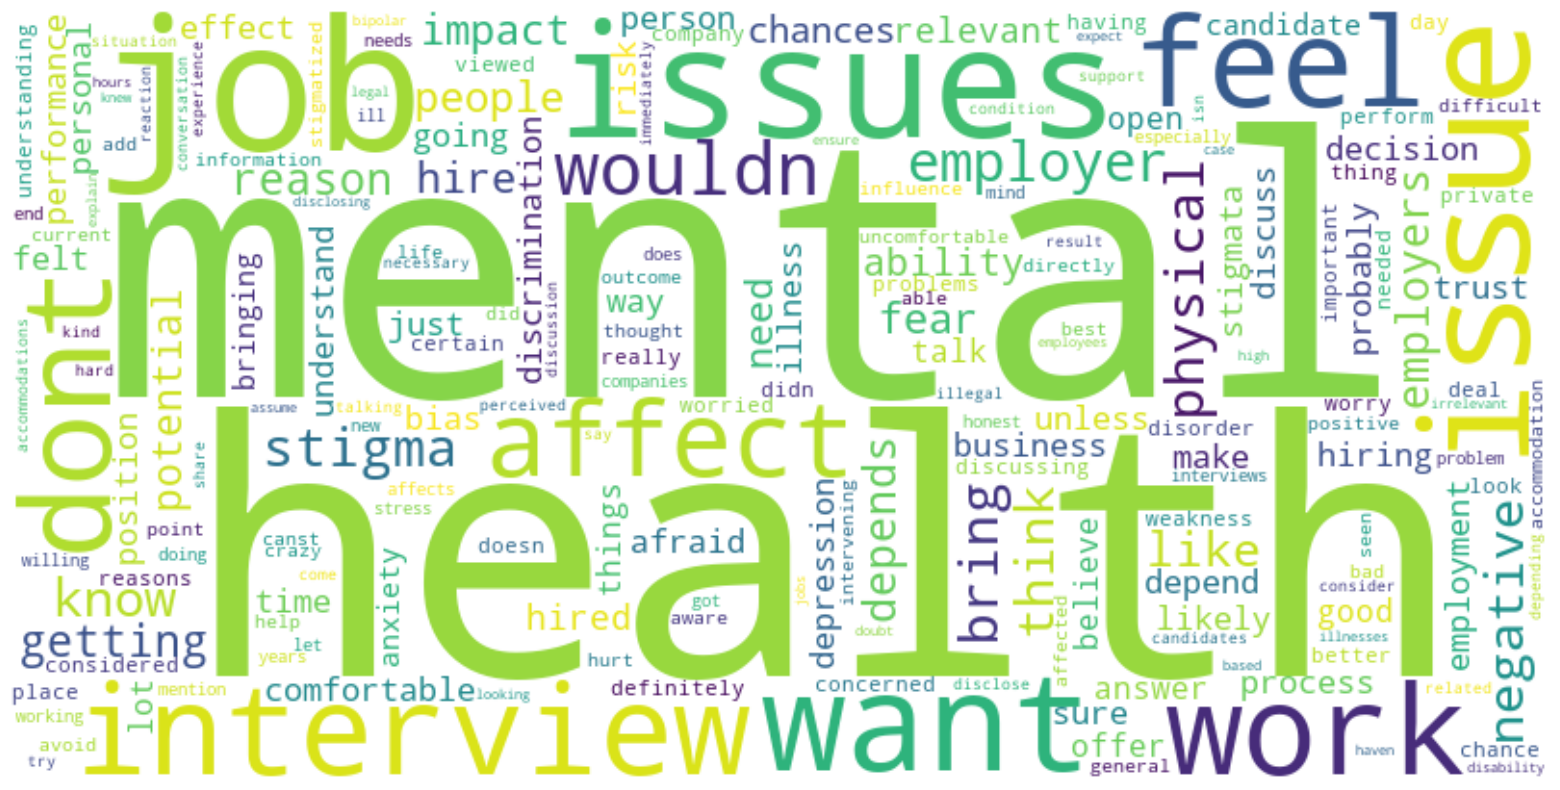

In [8]:
text_data = df_opinion['why_mental']

vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(text_data)

word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

wordcloud = WordCloud(width=800,height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

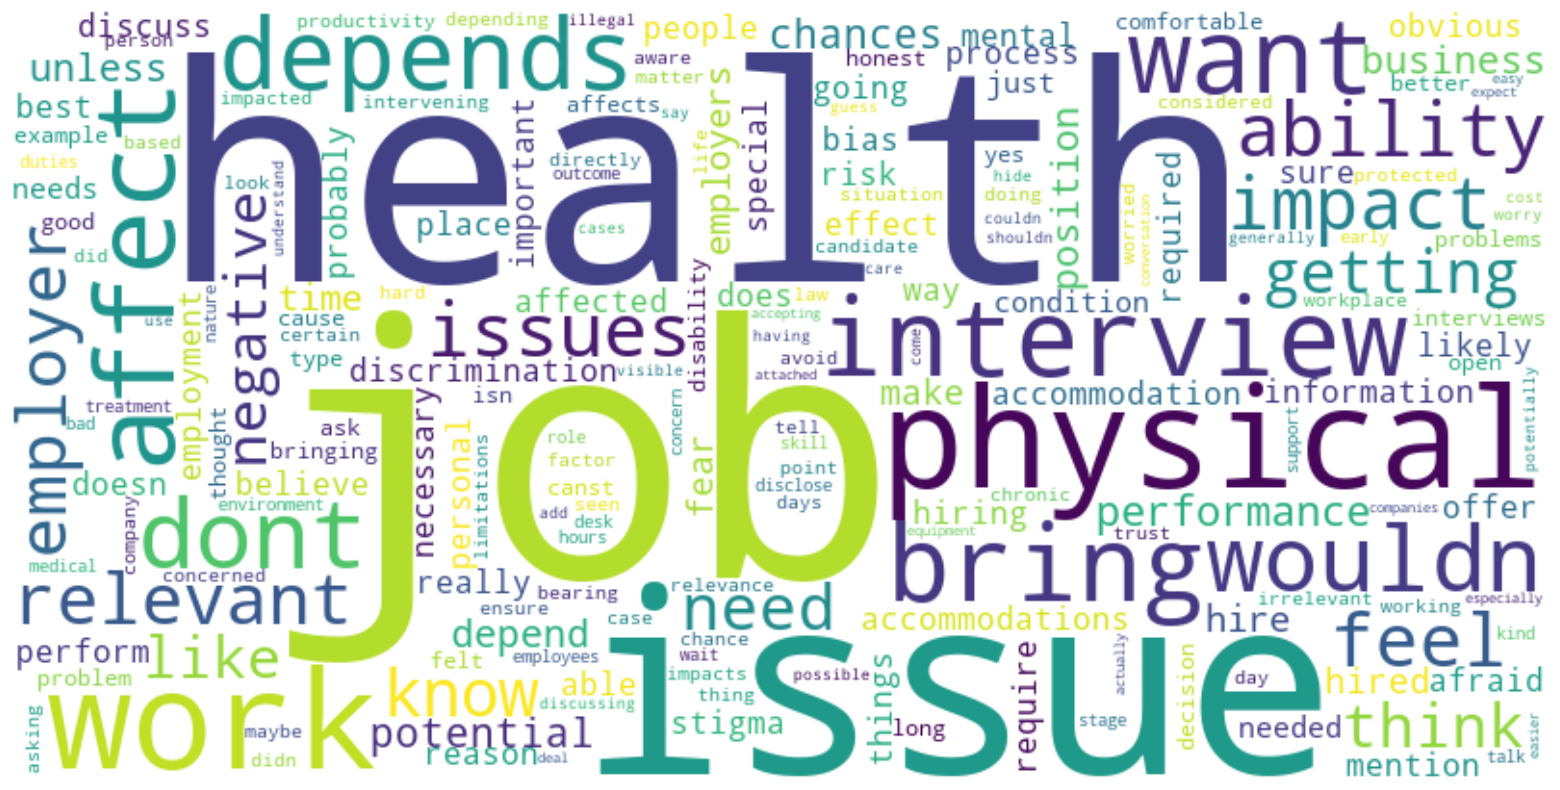

In [9]:
text_data = df_opinion['why_physical']

vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(text_data)

word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

wordcloud = WordCloud(width=800,height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

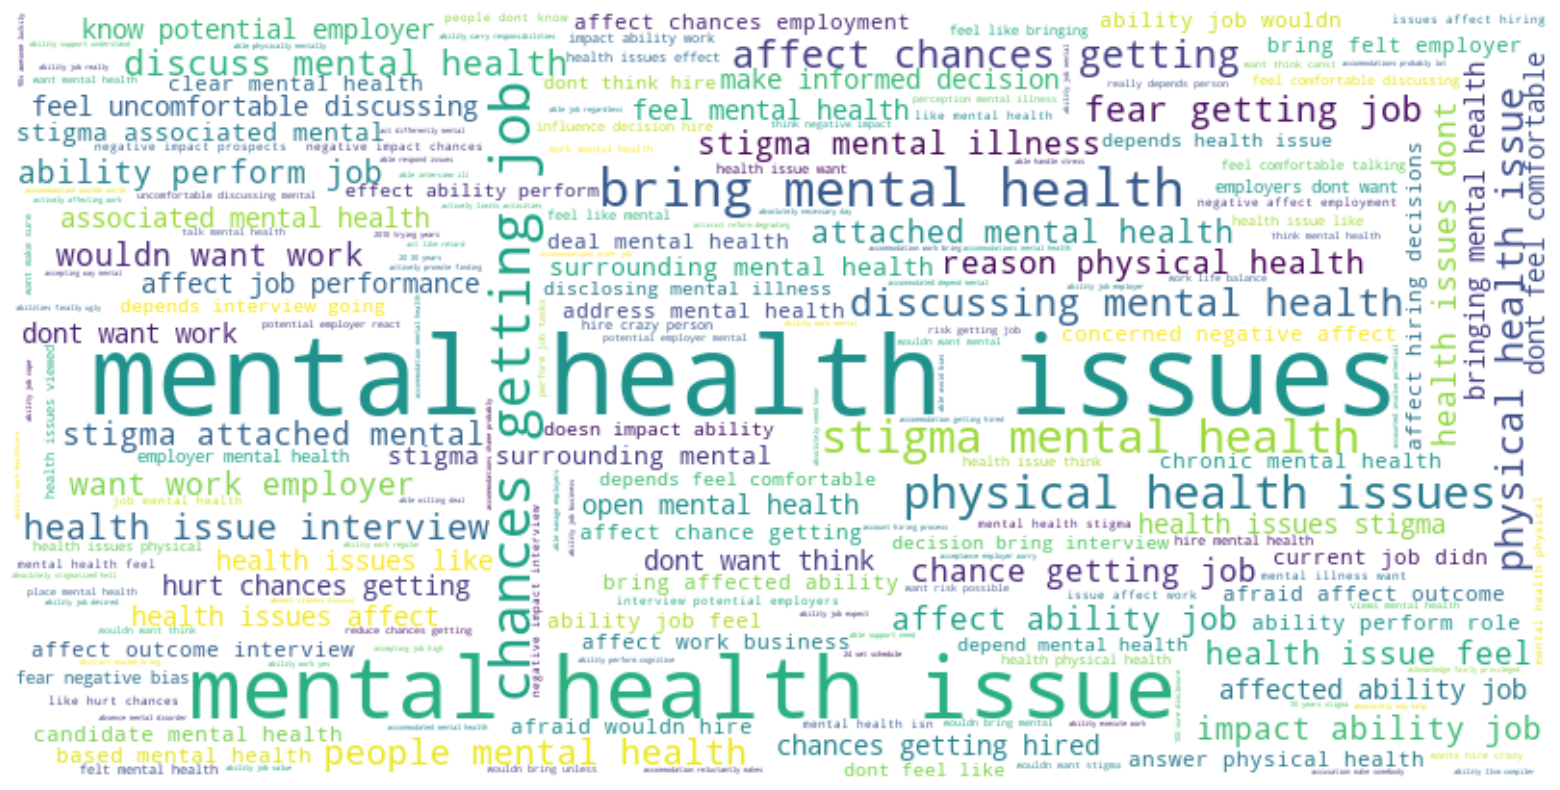

In [10]:
text_data = df_opinion['why_mental']
vectorizer_ngrams = CountVectorizer(ngram_range=(3,3),stop_words='english')
X_ngrams = vectorizer_ngrams.fit_transform(text_data)

ngrams_freq = dict(zip(vectorizer_ngrams.get_feature_names_out(), X_ngrams.toarray().sum(axis=0)))

wordcloud_ngrams = WordCloud(width=800,height=400, background_color='white').generate_from_frequencies(ngrams_freq)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud_ngrams,interpolation='bilinear')
plt.axis('off')
plt.show()

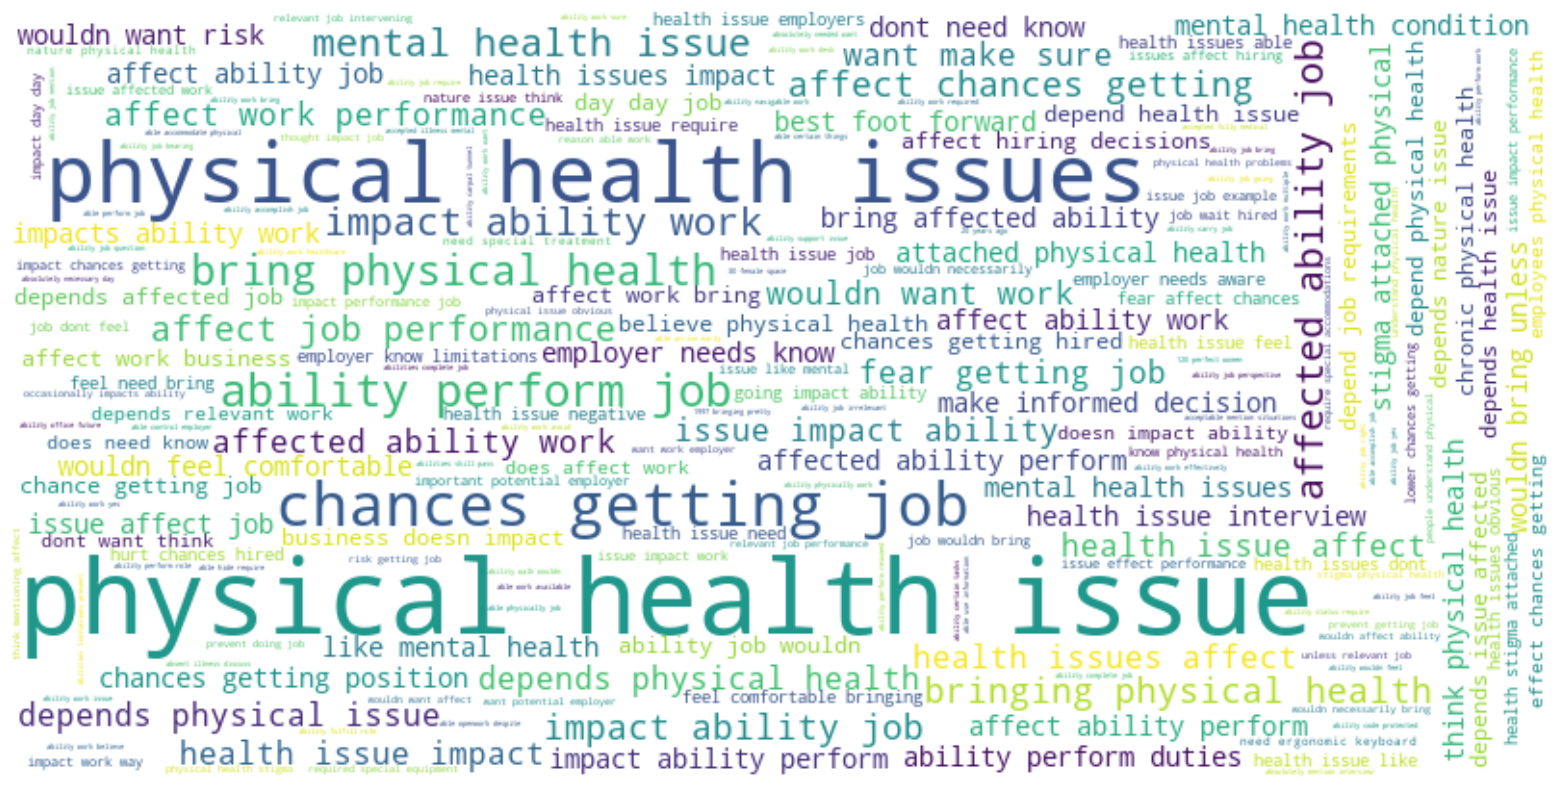

In [11]:
text_data = df_opinion['why_physical']
vectorizer_ngrams = CountVectorizer(ngram_range=(3,3),stop_words='english')
X_ngrams = vectorizer_ngrams.fit_transform(text_data)

ngrams_freq = dict(zip(vectorizer_ngrams.get_feature_names_out(), X_ngrams.toarray().sum(axis=0)))

wordcloud_ngrams = WordCloud(width=800,height=400, background_color='white').generate_from_frequencies(ngrams_freq)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud_ngrams,interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
df_opinion['sentiment_polarity_mental'] = df_opinion['why_mental'].apply(lambda text: TextBlob(text).sentiment.polarity)
df_opinion['sentiment_subjectivity_mental'] = df_opinion['why_mental'].apply(lambda text : TextBlob(text).sentiment.subjectivity)

print(df_opinion[['sentiment_polarity_mental', 'sentiment_subjectivity_mental']].describe())

'''
Sentiment Polarity:
Neutral Average: The near-zero mean polarity suggests that overall, responses regarding willingness to discuss mental health in interviews are neither overwhelmingly positive nor negative. This neutrality could indicate a balanced view where individuals see both pros and cons in discussing mental health in such settings.
Variability in Sentiment: The presence of both strong negative (min = -0.8) and strong positive (max = 1.0) sentiments reflects diverse individual experiences and attitudes. Some may have had positive experiences where discussing mental health was beneficial, while others might have faced stigma or discrimination, leading to negative views.
'''

'''
Sentiment Subjectivity:
Moderate Subjectivity: The average subjectivity score suggests that responses contain a mix of factual information and personal opinions. This can indicate that while some responses are based on personal experiences or feelings about discussing mental health, others might be more objective, possibly citing general beliefs or societal norms.
Range of Subjectivity: With some responses being completely non-subjective (score = 0) and others fully subjective (score = 1), there's a wide range in how people discuss mental health—some might state it as a matter of fact, while others express deeply personal views.
'''

'''
Implications
In the context of willingness to discuss mental health in an interview:

Neutral Polarity: Indicates cautious attitudes. Many might consider discussing mental health as risky, potentially affecting their job prospects, balanced against the need for transparency and finding a supportive workplace.
High Polarity Extremes: Reflect the potentially polarizing nature of this topic. Some individuals may advocate strongly for openness as a means to foster understanding and support, while others fear negative judgments that could impact their career.
Moderate to High Subjectivity: Demonstrates that discussions about mental health are often personal and can vary greatly depending on individual experiences and the perceived or actual reactions of interviewers or employers.
'''



       sentiment_polarity_mental  sentiment_subjectivity_mental
count                1065.000000                    1065.000000
mean                   -0.002596                       0.324419
std                     0.194090                       0.306131
min                    -0.800000                       0.000000
25%                    -0.050000                       0.000000
50%                     0.000000                       0.300000
75%                     0.010000                       0.532727
max                     1.000000                       1.000000


'\nImplications\nIn the context of willingness to discuss mental health in an interview:\n\nNeutral Polarity: Indicates cautious attitudes. Many might consider discussing mental health as risky, potentially affecting their job prospects, balanced against the need for transparency and finding a supportive workplace.\nHigh Polarity Extremes: Reflect the potentially polarizing nature of this topic. Some individuals may advocate strongly for openness as a means to foster understanding and support, while others fear negative judgments that could impact their career.\nModerate to High Subjectivity: Demonstrates that discussions about mental health are often personal and can vary greatly depending on individual experiences and the perceived or actual reactions of interviewers or employers.\n'

In [13]:
df_opinion['sentiment_polarity_phys'] = df_opinion['why_physical'].apply(lambda text: TextBlob(text).sentiment.polarity)
df_opinion['sentiment_subjectivity_phys'] = df_opinion['why_physical'].apply(lambda text : TextBlob(text).sentiment.subjectivity)

print(df_opinion[['sentiment_polarity_phys', 'sentiment_subjectivity_phys']].describe())

'''
Sentiment Polarity:
Positive Average: The mean polarity score of approximately 0.036 suggests that, on average, responses are slightly more positive than negative. This could indicate a general willingness or a less stigmatized view of discussing physical health in professional settings.
Range and Variability: The polarity ranges from -0.8 (negative) to 1.0 (highly positive), showing that while some responses are negative, likely due to experiences or fears of discrimination, others are quite positive, possibly reflecting positive experiences or a belief in the importance of transparency regarding physical health issues.
'''

'''
Sentiment Subjectivity:
Moderately High Subjectivity: The average subjectivity score of about 0.36 implies that responses tend to include a mix of personal opinions and objective statements. This indicates that discussions around physical health are influenced by personal feelings and beliefs, reflecting individual experiences.
Diversity in Subjectivity: Some responses are entirely objective (minimum subjectivity of 0), and some are highly subjective (maximum of 1). This variation suggests that people's statements about discussing physical health can range from purely factual (e.g., citing company policies) to deeply personal (e.g., personal experiences with illness).
'''

'''
Implications for Discussing Physical Health in Interviews:
Positive Polarity: Suggests that talking about physical health might be seen as less risky or more accepted compared to mental health. Candidates might perceive physical health issues as more understandable or relatable in a professional context.
Variability in Sentiment: Reflects diverse personal and societal attitudes towards physical health. For some, openness can be seen as a way to ensure workplace accommodations or support, while for others, it might raise concerns about bias or reduced job prospects.
Moderate to High Subjectivity: Points to the personal nature of such discussions. Candidates' willingness to discuss these topics may strongly depend on their previous experiences with how such information was received by potential employers.
''' 


       sentiment_polarity_phys  sentiment_subjectivity_phys
count              1065.000000                  1065.000000
mean                  0.035566                     0.358628
std                   0.217788                     0.337699
min                  -0.800000                     0.000000
25%                   0.000000                     0.000000
50%                   0.000000                     0.333333
75%                   0.100000                     0.600000
max                   1.000000                     1.000000


"\nImplications for Discussing Physical Health in Interviews:\nPositive Polarity: Suggests that talking about physical health might be seen as less risky or more accepted compared to mental health. Candidates might perceive physical health issues as more understandable or relatable in a professional context.\nVariability in Sentiment: Reflects diverse personal and societal attitudes towards physical health. For some, openness can be seen as a way to ensure workplace accommodations or support, while for others, it might raise concerns about bias or reduced job prospects.\nModerate to High Subjectivity: Points to the personal nature of such discussions. Candidates' willingness to discuss these topics may strongly depend on their previous experiences with how such information was received by potential employers.\n"

In [14]:
'''
Implications for Discussion in Interviews
Polarity Comparison: Responses about physical health are generally more positive, which could imply that candidates feel safer or more accepted when discussing physical as opposed to mental health conditions. The negative sentiment surrounding mental health discussions points to ongoing stigmas and potential fears of bias.
Subjectivity Comparison: Both topics show moderate subjectivity, which underscores the personal nature of health discussions. However, the slightly higher subjectivity in physical health discussions could reflect a greater variability in how individuals perceive and react to physical health conditions based on their personal experiences.
Overall Comparison
Stigma and Acceptance: The results reflect a broader societal view where physical health issues are often less stigmatized than mental health issues. This can influence how openly individuals are willing to discuss these topics during job interviews.
Cultural and Corporate Attitudes: The slight positivity in discussing physical health and the negativity around mental health could guide organizations in understanding and improving their health-related discourse practices. Promoting a more inclusive and supportive environment may help reduce the negative perceptions and increase openness during interviews.
''' 

'\nImplications for Discussion in Interviews\nPolarity Comparison: Responses about physical health are generally more positive, which could imply that candidates feel safer or more accepted when discussing physical as opposed to mental health conditions. The negative sentiment surrounding mental health discussions points to ongoing stigmas and potential fears of bias.\nSubjectivity Comparison: Both topics show moderate subjectivity, which underscores the personal nature of health discussions. However, the slightly higher subjectivity in physical health discussions could reflect a greater variability in how individuals perceive and react to physical health conditions based on their personal experiences.\nOverall Comparison\nStigma and Acceptance: The results reflect a broader societal view where physical health issues are often less stigmatized than mental health issues. This can influence how openly individuals are willing to discuss these topics during job interviews.\nCultural and Co

In [15]:
features = [
    'willing_discuss_physical_health_in_interview',
    'willing_discuss_mental_health_in_interview',
    'identified_mental_health_impact_career',
    'team_view_negatively_mental_health',
    'willing_share_mental_health_with_friends_family',
    'observed_bad_mental_health_response',
    'less_likely_to_reveal_due_to_observation'
]

for feature in features:
    print(f"{df_opinion[feature].unique()}")

['Maybe' 'Yes' 'No']
['No' 'Yes' 'Maybe']
["No, I don't think it would" 'Maybe' 'Yes, I think it would'
 'No, it has not' 'Yes, it has']
["No, I don't think they would" 'Maybe' 'Yes, they do'
 'Yes, I think they would' 'No, they do not']
['Somewhat open' 'Neutral'
 'Not applicable to me (I do not have a mental illness)' 'Very open'
 'Not open at all' 'Somewhat not open']
['No' 'Maybe/Not sure' 'Yes, I experienced' 'Yes, I observed' nan]
[nan 'Yes' 'No' 'Maybe']


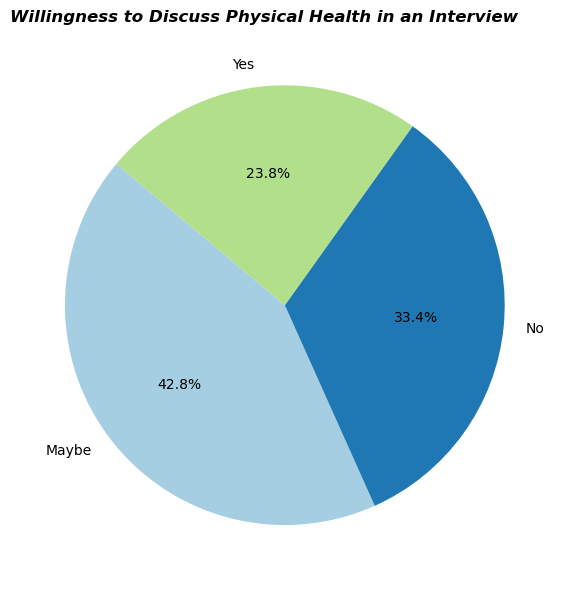

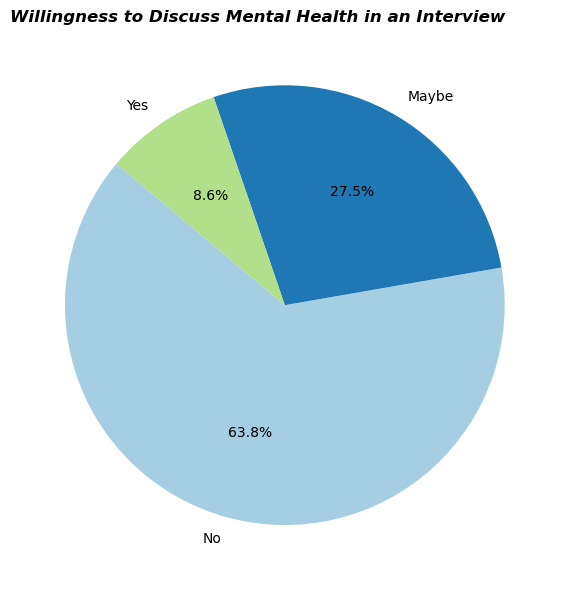

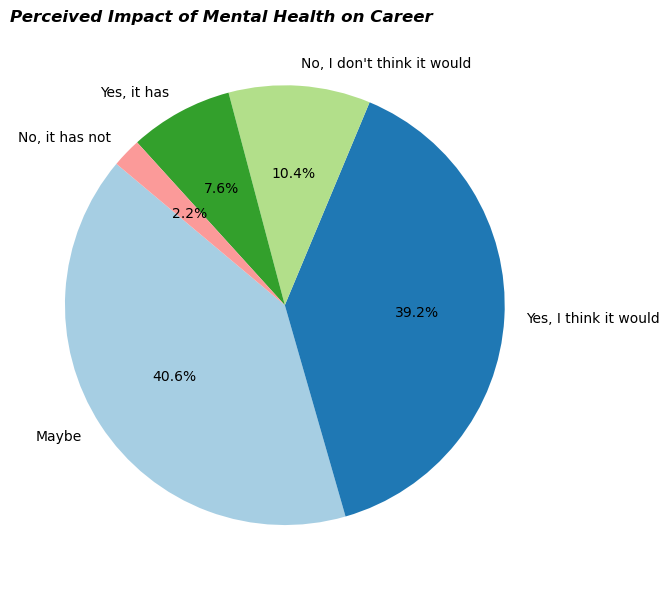

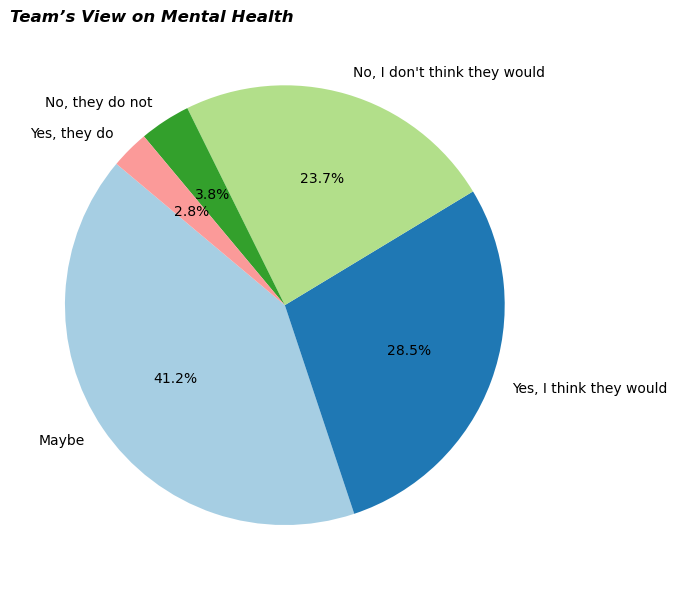

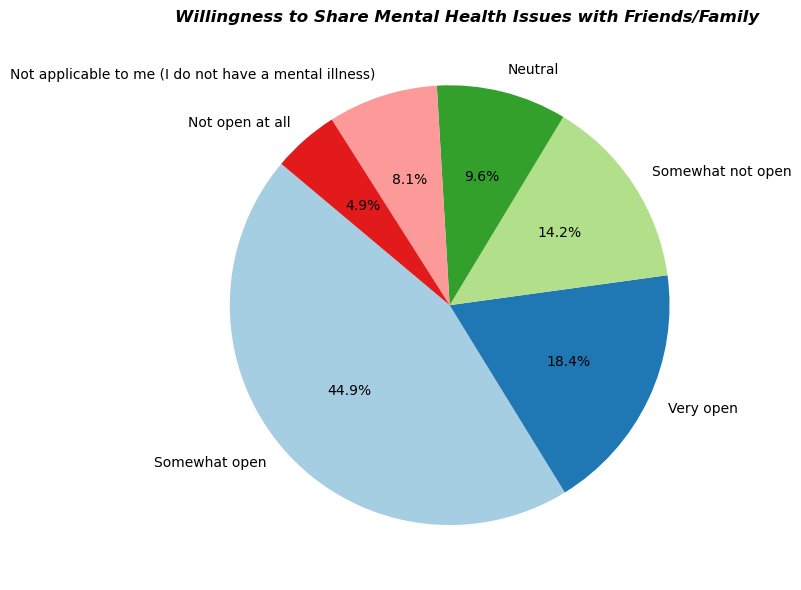

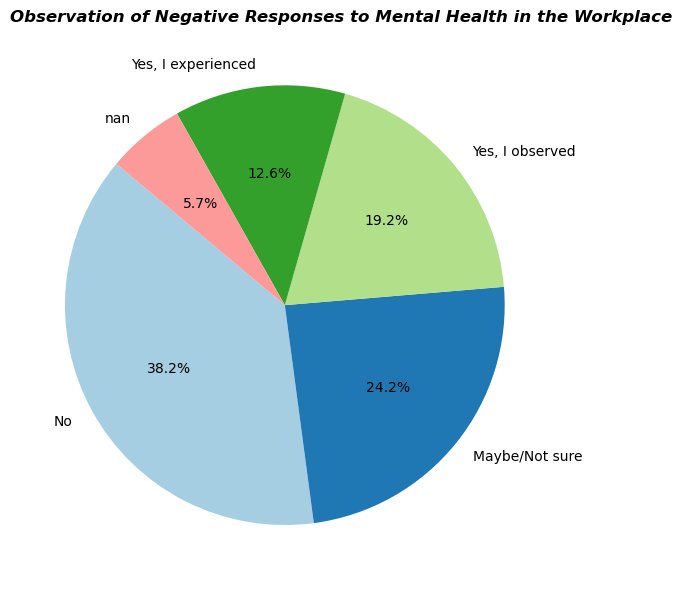

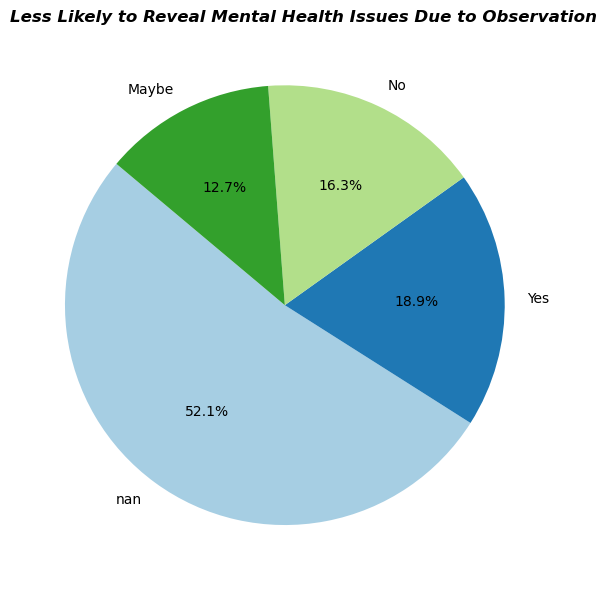

In [16]:
def plot_pie_chart(data,column,title):
    counts=data[column].value_counts(dropna=False)
    plt.figure(figsize=(12,6))
    plt.pie(counts, labels=counts.index,autopct='%1.1f%%',startangle=140, colors=plt.cm.Paired(range(len(counts))))
    plt.title(title,loc='left', style='italic', fontweight='bold', fontsize=12)
    plt.tight_layout()
    plt.show()

features_with_titles = {
    'willing_discuss_physical_health_in_interview': 'Willingness to Discuss Physical Health in an Interview',
    'willing_discuss_mental_health_in_interview': 'Willingness to Discuss Mental Health in an Interview',
    'identified_mental_health_impact_career': 'Perceived Impact of Mental Health on Career',
    'team_view_negatively_mental_health': 'Team’s View on Mental Health',
    'willing_share_mental_health_with_friends_family': 'Willingness to Share Mental Health Issues with Friends/Family',
    'observed_bad_mental_health_response': 'Observation of Negative Responses to Mental Health in the Workplace',
    'less_likely_to_reveal_due_to_observation': 'Less Likely to Reveal Mental Health Issues Due to Observation'
}

for feature, title in features_with_titles.items():
    plot_pie_chart(df_opinion,feature,title)